---

# Проект "Аналитика для интернет-магазина"

В проекте необходимо проанализировать гипотезы по увеличению выручки интернет-магазина и запустить A/B-тест

## Приоритизация гипотез

Имеется 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Применим фреймворк ICE и RICE для приоритизации гипотез, найдем лидеров и различия между методиками.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
hyp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.set_option("max_colwidth", 120)
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Используются верные типы данных. Переименуем названия столбцов, оставив строчные буквы

In [5]:
hyp.columns=['hypothesis','reach','impact','confidence','efforts']

Для оценки перспективности гипотез используем методики ICE RICE

In [6]:
hyp['ICE'] = (hyp['impact'] * hyp['confidence'])/hyp['efforts']
display(hyp[['hypothesis','ICE']].sort_values(by='ICE', ascending = False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


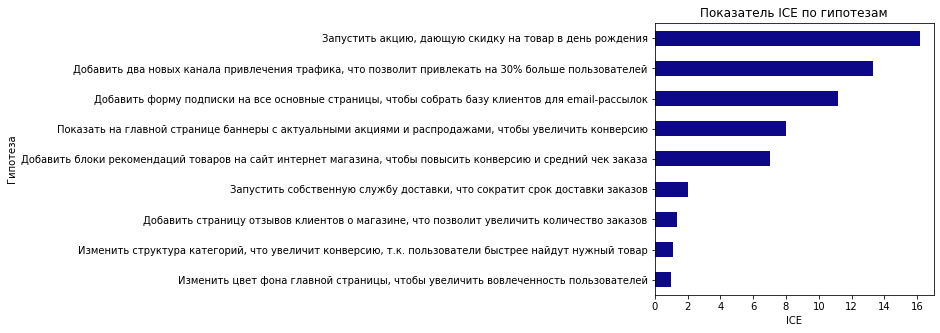

In [7]:
hyp = hyp.sort_values(by='ICE')
hyp.plot(x='hypothesis', y='ICE', kind='barh', figsize = (5,5), colormap= 'plasma', legend=False)
plt.xlabel('ICE')
plt.ylabel('Гипотеза')
plt.title('Показатель ICE по гипотезам');

Согласно анализу по показателю ICE, лучшими гипотезами являются:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [8]:
hyp['RICE'] = (hyp['reach']*hyp['impact'] * hyp['confidence'])/hyp['efforts']
hyp[['hypothesis','RICE']].sort_values(by='RICE', ascending = False)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [9]:
hyp

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


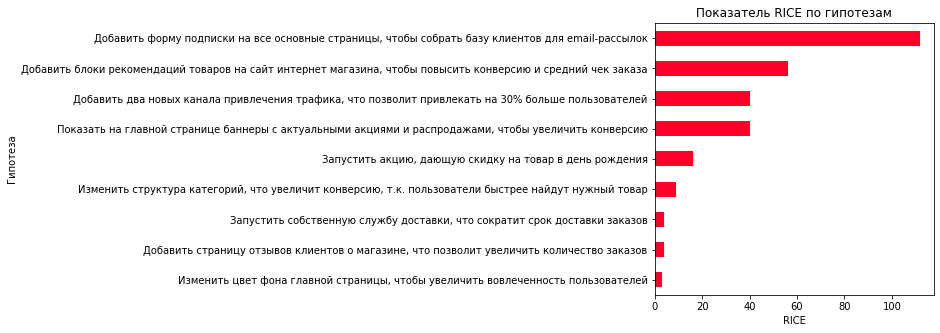

In [10]:
hyp = hyp.sort_values(by='RICE')
hyp.plot(x='hypothesis', y='RICE', kind='barh', figsize = (5,5), colormap= 'gist_rainbow', legend=False)
plt.xlabel('RICE')
plt.ylabel('Гипотеза')
plt.title('Показатель RICE по гипотезам');

RICE даёт несколько другие результаты, однако в топ 3 остаются следующие гипотезы в сравнении с ICE: 
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
На приоритизацию оказал влияние показатель 'reach', подразумевающий охват пользователей. Он является самым низким для гипотезы по запуску акции, приуроченной к скидке на день рождения, поэтому между двумя методами возникли различия. Одновременно с этим высокий охват может быть обеспечен благодаря добавлению блоков рекомендаций товаров на сайт интернет-магазина, которого не было в лидерах анализа ICE, но по RICE он на втором месте.

## Анализ A/B-теста

Для анализа A/B-теста потребуется:
1. Построить графики по кумулятивной выручке, среднему чеку, конверсии по группам. 
2. Нарисовать точечные графики количества заказов , стоимостей заказов. 
3. Посчитать 95-й и 99-й перцентили количества и стомости заказов на пользователя, выбрав границу для определения аномальных пользователей.
4. Выяснить статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» и по «очищенным» данным. Сделайте выводы и предположения.
5. Принять решение, достаточно ли сведений для вывода о преобладании одной из групп, или требуется продолжить тест

In [11]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Проверим датафрейм orders на наличие дубликатов, пропусков, неверных типов данных

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Переименуем столбцы в более удобный формат, изменим тип данных для даты

In [14]:
orders.columns = ['transaction_id','visitor_id','date','revenue','group']
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
orders.duplicated().sum()

0

In [16]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Пропусков и дубликатов не обнаружено. Обратимся ко второму датафрейму

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors.sample(5)

,date,group,visitors
1,2019-08-02,A,619
4,2019-08-05,A,756
37,2019-08-07,B,709
11,2019-08-12,A,595
2,2019-08-03,A,507


Снова проблема в типом данных для даты

In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [20]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [21]:
visitors.duplicated().sum()

0

Предобработка данных проведена

In [22]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

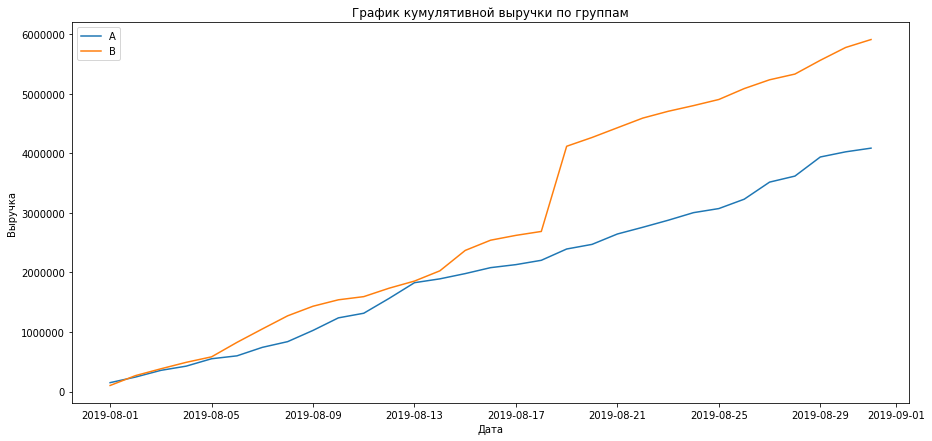

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')


plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам');
plt.legend();

Кумулятивная выручка группы В выше, резкие скачки роста заказов произошли между 13 августа 2019 и 21 августа 2019 года. Для группы А нарастание выручки более равномерное. Необходимо проверить другие показатели для понимания отличий.

Построим графики для среднего чека

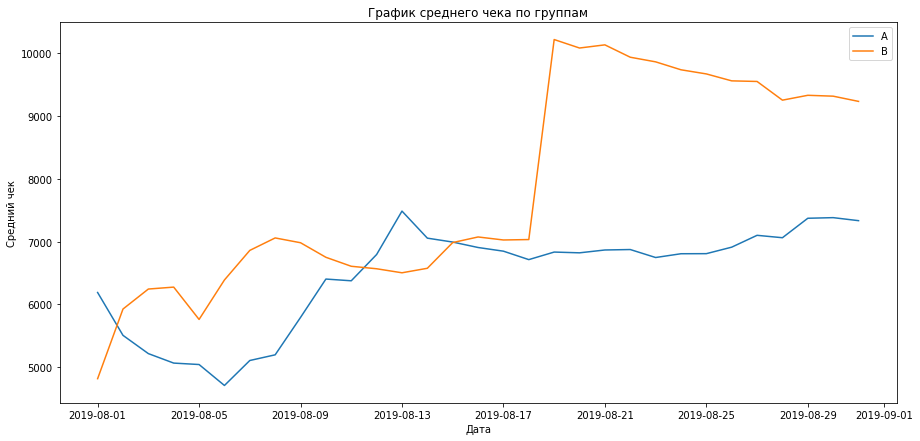

In [24]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('График среднего чека по группам');
plt.legend();

Для группы В наблюдается всплеск показателя "средний чек" в период с 17 августа по 21 августа. Ближе к завершению тестирования чеки для обеих групп распределяются равномерно, они выше у группы В.
Повлиять на повышение среднего чека могли крупные заказы, обеспечившие высокую выручку. Это можно отследить, сравним между собой средние чеки групп.

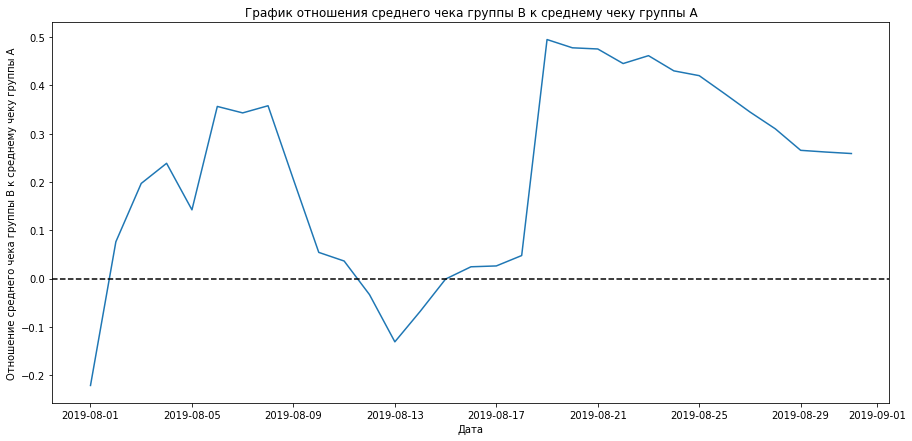

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы В к среднему чеку группы А')
plt.title('График отношения среднего чека группы В к среднему чеку группы А');
plt.axhline(y=0, color='black', linestyle='--'); 

Заметно преобладание среднего чека в группе В не только с 17 августа и далее, но и с 2 августа по 11 августа. Средний чек в группе А в течение периода наблюдаения был выше лишь 1 и 13 августа. На снове имеющихся данных можно предположить, что для группы В более хакатерны крупные покупки пользователями.

Определим различия конверсии групп

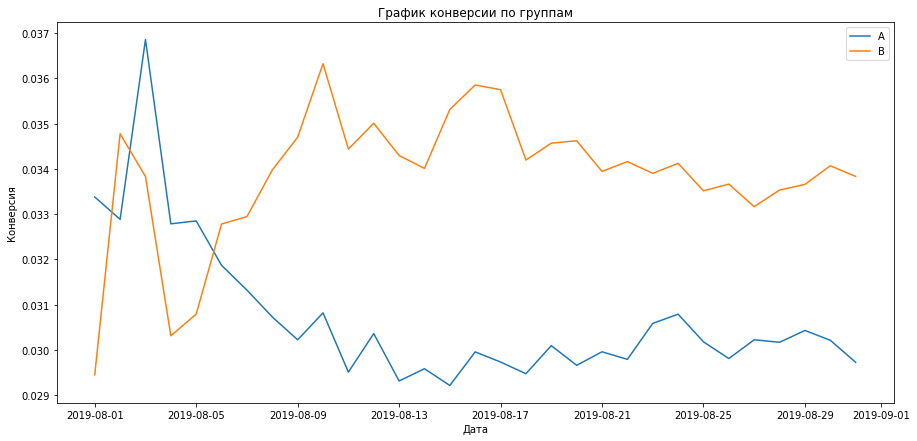

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График конверсии по группам');
plt.legend();



До 5 августа графики по конверсии схожи, однако после отчётливо видно преобладание группы В благодаря резкому скачку.

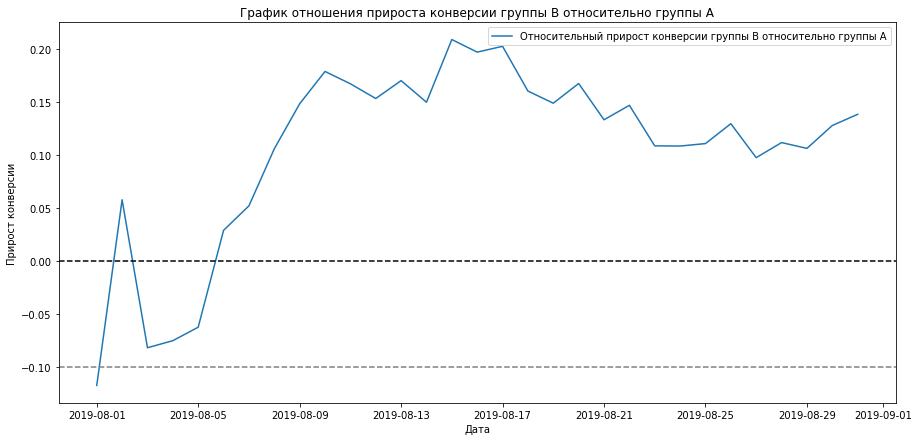

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Прирост конверсии')
plt.title('График отношения прироста конверсии группы В относительно группы А');
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

В период с 5 по 10 августа группа В получила значительный приток по конверсии, благодаря чему её кумулятивный результат выше. Далее результаты стабилизируются, значит преимущество группы В обусловлено именно всплеском в указанные даты.

Построим точечный график количества заказов по пользователям

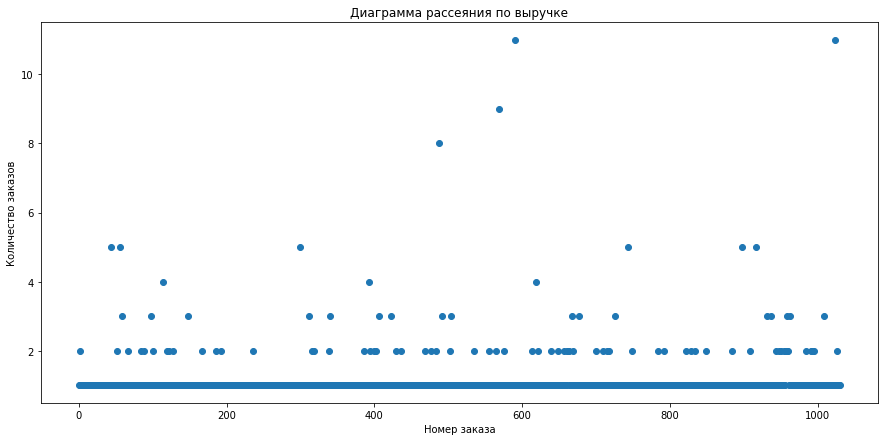

In [28]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

ordersByUsers.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.xlabel('Номер заказа')
plt.ylabel('Количество заказов')
plt.title('Диаграмма рассеяния по выручке')
plt.scatter(x_values, ordersByUsers['orders']);


Большинство пользователей совершили 1-3 заказа. Уточнили перцентили

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

5% пользователей заказывали дважды, 1% пользователей - четырежды и более. Возьмем за нижнюю границу для отсеивания аномалий 2 заказа

Проведем аналогичную процедуру для подсчёта аномалий по выручке

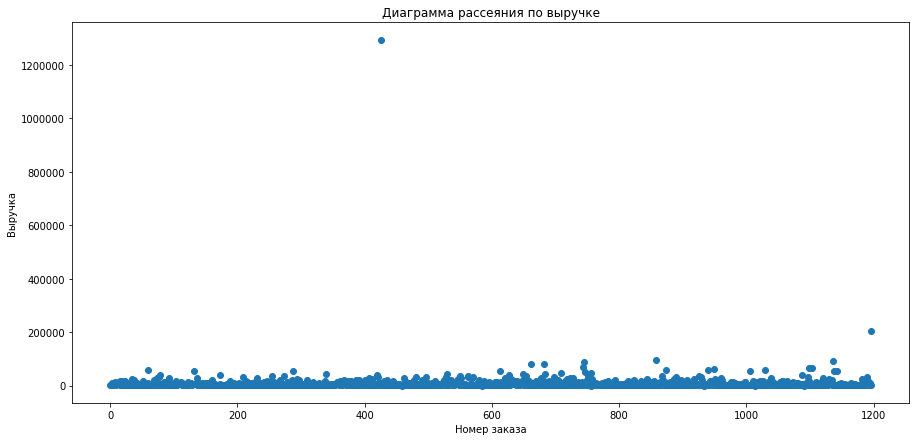

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.xlabel('Номер заказа')
plt.ylabel('Выручка')
plt.title('Диаграмма рассеяния по выручке');
plt.scatter(x_values, orders['revenue']);

Откровенно выбивающихся значений по графику всего два. Определим перцентили.

In [31]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Логично для отсеивания аномалий использовать 28000, так как между 95 и 99 перцентилями слишком большая разница, то есть выше 95 перцентиля уже возникают редкие крупные заказы, искажающие результаты.

Сравним "сырые" данные. В качестве нулевой гипотезы установим, что статистически значимых различий в конверсии между группами нет. Соответственно, альтернативной гипотезой будет наличие существенных различий между группами.  
Пусть alpha = 0.05.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [33]:
display("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

'0.008'

p-value = 0.008, что меньше alpha, значит мы отвергаем нулевую гипотезу, и имеются важные различия.

In [34]:
display("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

'0.138'

Относительный прирост конверсии в группе В по сравнению с группой А согласно "сырым" данным равен 13,8%.

Теперь обратимся к среднему чеку. Оставим alpha = 0.05. Нулевая гипотеза: нет различий между группами. Альтернативная гипотеза: между группами имеются статистически важные расхождения.

In [35]:
display("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))


'0.365'

Мы не можем отвергнуть нулевую гипотезу, p-value = 0.365, что значительно больше alpha

In [36]:
display("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

'0.259'

Средний чек группы В на 25,9% выше, чем в группе А.

Для отсеивания аномалий используем найденные ранее перцентили. Установим, что в "чистых" данных мы оставляем лишь тех, кто сделал 3 заказа и менее, и сумма не более 30000.
alpha = 0.05. Нулевая гипотеза: нет различий между группами. Альтернативная гипотеза: между группами имеются статистически важные расхождения.

In [37]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

display('{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

'0.00942'

'0.144'

Как и в случае с "сырыми" данными, наблюдается статистически важное превышение группы В по конверсии 14,4%

Проверим на обновленных данных p-value по среднему чеку. Нулевая гипотеза: нет различий между группами. Альтернативная гипотеза: между группами имеются статистически важные расхождения.
alpha = 0.05.

In [38]:
display(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'0.490'

'-0.017'

p-value увеличился, но разница между группами исчезла. Изменим параметры отсеивания, проверим вариант, когда в наших данных остаются лишь те, кто совершил один заказ, и сумма не превысила 58000 (99% перцентиль по чеку). В качестве нулевой гипотезы установим, что статистически значимых различий в конверсии между группами нет. Соответственно, альтернативной гипотезой будет наличие существенных различий между группами.  
Пусть alpha = 0.05.

In [39]:
usersWithManyOrders1 = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders1 = orders[orders['revenue'] > 58000]['visitor_id']
abnormalUsers1 = (
    pd.concat([usersWithManyOrders1, usersWithExpensiveOrders1], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered1 = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers1))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered1 = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers1))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

display(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers1)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers1)),
                )
            ]['revenue'],
        )[1]
    )
)

display(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers1)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers1)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

'0.497'

'0.010'

Очевидно, отсеивание 1% дорогостоящих чеков приводит к результату, что по "чистым" данным по среднему чеку различий между группами нет.

## Общий вывод

Проведение A/B теста привело к следующим результатам:  
1. У группы В наблюдается конверсия примерно на 14% выше, чем у группы А как по "сырым", так и по "чистым" данным. Об этом же свидетельствует и график по конверсии.  
2. До фильтрации аномалий средний чек группы В на 26% превышает его же для группы А. После отсеивания статистически важных различий нет. Кумулятивная выручка группы В выше благодаря 14 дорогостоящим заказам, что составляет 1% от общего числа.  

В итоге, имеет смысл остановить A/B тест и признать его успешным: рост конверсии группы В привёл к появлению ряда заказов с высоким чеком, что в конечном счёте повлияло на различие по выручке в пользу группы В.